# Задания

In [1]:
import numpy as np
import pandas as pd

## Задание 1

Загрузи информацию о [заявках на кредит](datasets/credit_scoring.csv). 
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

Клиенты, которым должны одобрить заявку на кредит: ____

In [2]:
df = pd.read_csv('../datasets/credit_scoring.csv', low_memory=False)  # Загрузка файла в df
df_kr=df[
    (df['Возраст'] >= 18) & 
    (df['Месячный доход'] >= 10000)
] # отфильтруем только те строки, у которых в колонке Месячный доход >= 10000 , и чей возраст >= 18
print('Клиенты, которым должны одобрить заявку на кредит: ', df_kr['Имя'].tolist()) # Печать содержимого отфильтрованной колонки

Клиенты, которым должны одобрить заявку на кредит:  ['Ольга', 'Петр']


## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов. 
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен 
показывать вид ириса. Обязательно добавь легенду по маркерам. 

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

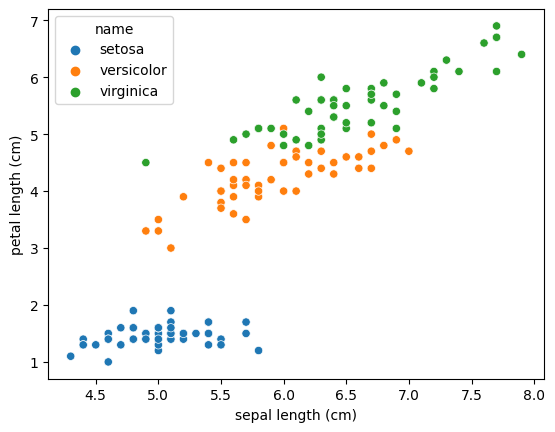

In [3]:
import seaborn as sns
from sklearn import datasets
from pandas import DataFrame
iris = datasets.load_iris()
iris_df = DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="petal length (cm)", hue="name")

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [4]:
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

target = iris_df['target']
data = iris_df[['sepal length (cm)', 'petal length (cm)']]

train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size = 0.2, random_state = 42)

estimator = DecisionTreeClassifier(max_depth=2)
estimator.fit(train_data, train_labels)

accuracy = accuracy_score(estimator.predict(test_data), test_labels)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.967


## Задание 4

Построй [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка". 
Также отрисуй дерево, которое получилось в результате обучения модели. 
Напиши сколько листов у получившегося дерева.

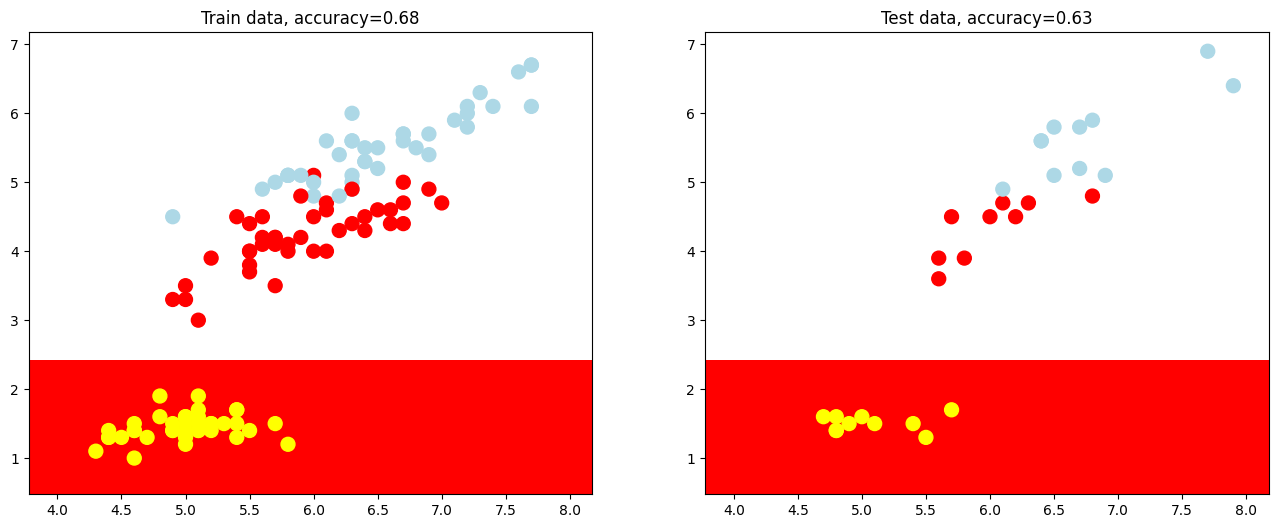

In [5]:
import matplotlib.pyplot as pyplot
from sklearn import metrics, tree 
from surface import plot_decision_surface
from sklearn import tree

estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)
estimator.fit(train_data.values, train_labels)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

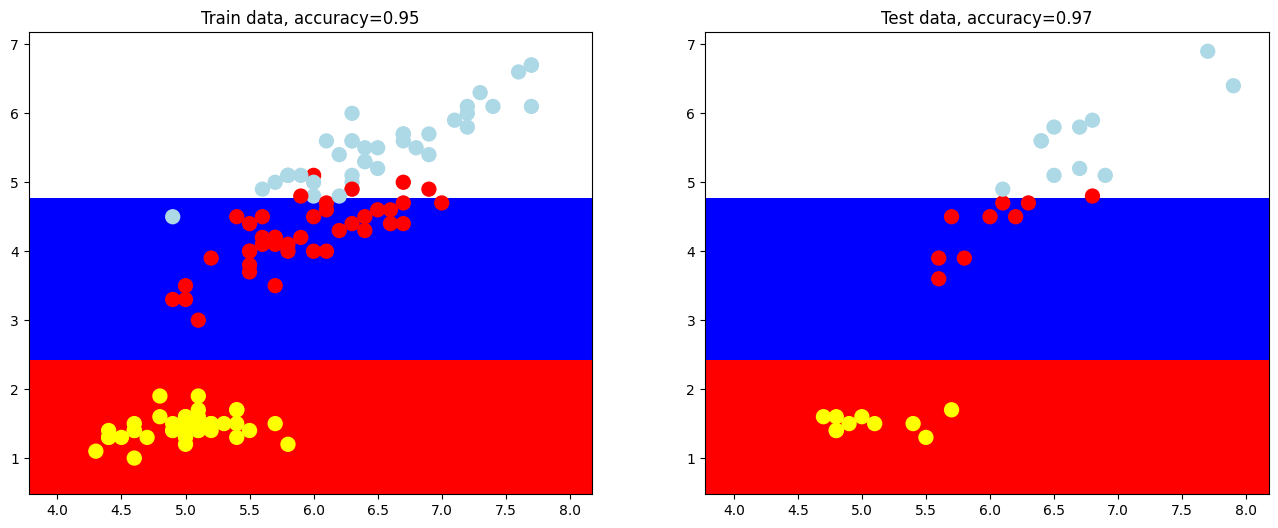

In [6]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 2)
estimator.fit(train_data.values, train_labels)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

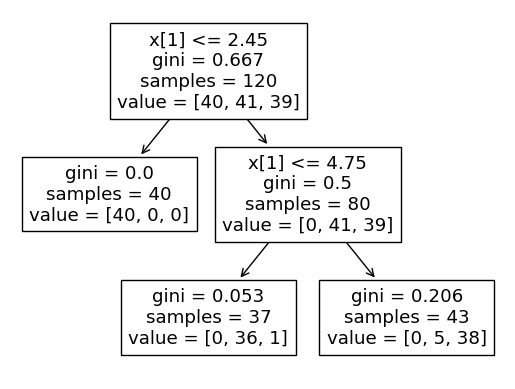

In [7]:
tree.plot_tree(estimator);

In [8]:
estimator.get_n_leaves()

3

У получившегося дерева 3 листов 

## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 250 отсчетов. 
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1. 
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from dataset import generate_sin
from sklearn import tree

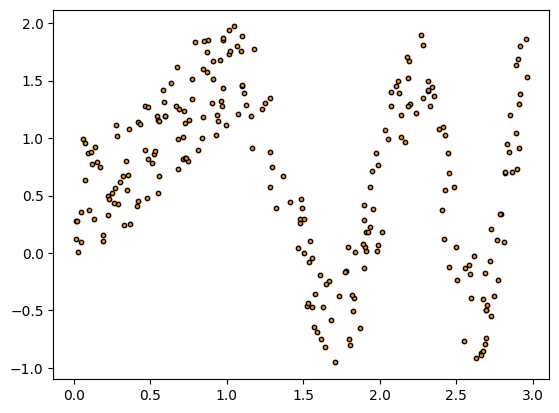

In [10]:
X, y = generate_sin(250, 1)
plt.figure()
plt.scatter(X,y,s=10,edgecolor="black",c= "darkorange",label = "date")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

regr_1 = DecisionTreeRegressor(max_depth = 1) # Максимальная глубина 1
regr_1 = regr_1.fit(X_train, y_train)

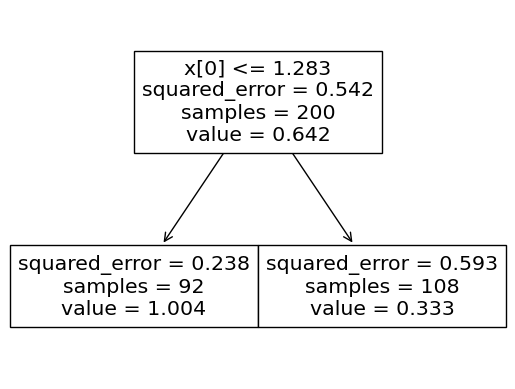

In [12]:
from sklearn import tree
tree.plot_tree(regr_1);

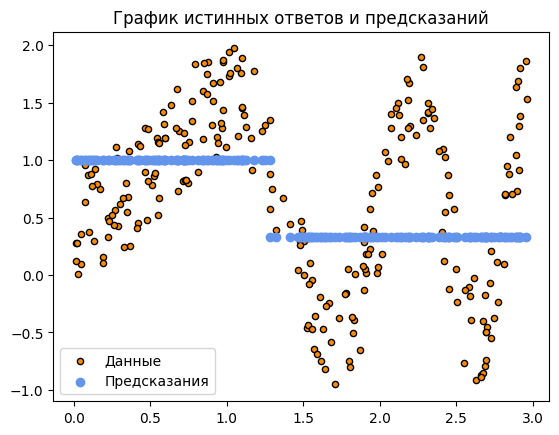

In [13]:
 # Нарисуйте точечную диаграмму цвет границы разброса edgecolors цвет точки c label label
plt.scatter(X,y, s=20,edgecolors="black",c="darkorange",label="Данные")
 # Цвет графика графика 
plt.scatter(X_train, regr_1.predict(X_train),color="cornflowerblue",label="Предсказания",linewidth =1)

plt.title ("График истинных ответов и предсказаний") # Заголовок
plt.legend () # Отображение легенды
plt.show()

## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее. 

MSE 1 0.44151173144970934
MSE 2 0.3522801483121674
MSE 3 0.28982350994772454
MSE 4 0.16504834370690502
MSE 5 0.1494779464670558
MSE 6 0.15554181189794603
MSE 7 0.1671500199432384
MSE 8 0.16413844091947705
MSE 9 0.16324633389735652
MSE 10 0.18587729264086708
MSE 11 0.1837678687240203
MSE 12 0.18402389395723534
MSE 13 0.18171542546437483
MSE 14 0.18171542546437483
MSE 15 0.18171542546437483
MSE 16 0.18171542546437483
MSE 17 0.18171542546437483
MSE 18 0.18171542546437483
MSE 19 0.18171542546437483
MSE 20 0.18171542546437483
MSE 21 0.18171542546437483
MSE 22 0.18171542546437483
MSE 23 0.18171542546437483
MSE 24 0.18171542546437483
MSE 25 0.18171542546437483
MSE 26 0.18171542546437483
MSE 27 0.18171542546437483
MSE 28 0.18171542546437483
MSE 29 0.18171542546437483
MSE 30 0.18171542546437483


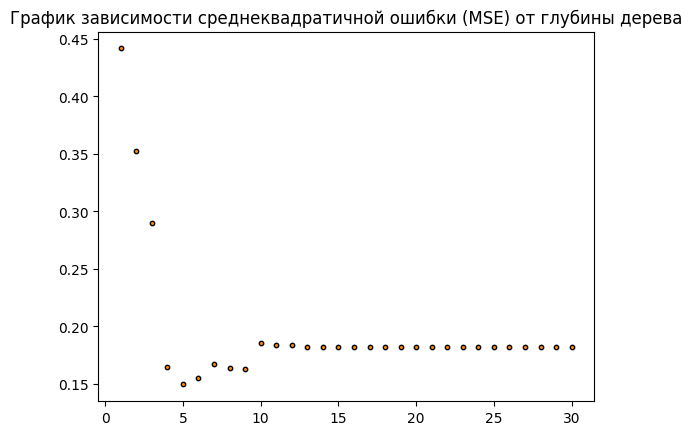

In [14]:
import sklearn
from sklearn.metrics import mean_squared_error

for i in range(1,31):
    regr_t = DecisionTreeRegressor(max_depth = i) # Максимальная глубина 1 - 30
    regr_t.fit(X_train, y_train)
    print('MSE', i, mean_squared_error(y_test, regr_t.predict(X_test)))
    plt.scatter(i, mean_squared_error(y_test, regr_t.predict(X_test)),s=10,edgecolor="black",c= "darkorange")
    plt.title ("График зависимости среднеквадратичной ошибки (MSE) от глубины дерева") # Заголовок

Глубина дерева, на котором MSE на тестовой выборке наилучший: __5

## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу 
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE 
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50). 
Напиши количество деревьев, при котором качество модели наилучшее. 

In [15]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from matplotlib.colors import ListedColormap
from dataset import generate_sin
from sklearn import tree

MSE 0.13596089412120815


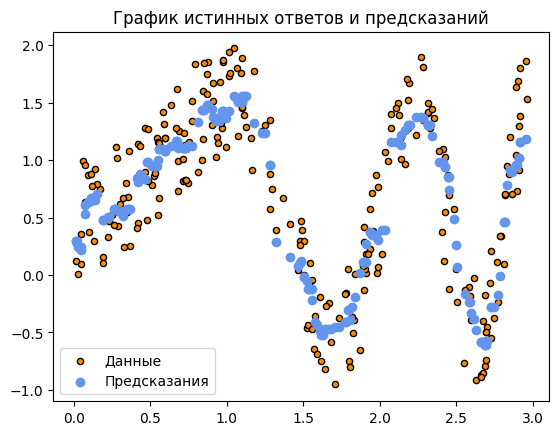

In [16]:
X, y = generate_sin(250, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

regr = BaggingRegressor(DecisionTreeRegressor(max_depth = 5), max_samples=40, n_estimators=10, bootstrap=True, random_state=42)
regr.fit(X_train, y_train.ravel())

print('MSE', mean_squared_error(y_test, regr.predict(X_test)))

 # Нарисуйте точечную диаграмму цвет границы разброса edgecolors цвет точки c label label
plt.scatter(X,y, s=20,edgecolors="black",c="darkorange",label="Данные")
 # Цвет графика графика 
plt.scatter(X_train, regr.predict(X_train),color="cornflowerblue",label="Предсказания",linewidth =1)

plt.title ("График истинных ответов и предсказаний") # Заголовок
plt.legend () # Отображение легенды
plt.show()

MSE 1 0.3552511283028721
MSE 2 0.1616108640794491
MSE 3 0.15249204238126257
MSE 4 0.13830770490393732
MSE 5 0.13680703027636004
MSE 6 0.14039308756552785
MSE 7 0.13454305382241905
MSE 8 0.13431840853411076
MSE 9 0.13306594614547054
MSE 10 0.13596089412120815
MSE 11 0.1414070070745387
MSE 12 0.13957284752591004
MSE 13 0.13783745891292526
MSE 14 0.1317989500019773
MSE 15 0.13446882087852463
MSE 16 0.12944794265694967
MSE 17 0.131036118443988
MSE 18 0.12541753712949086
MSE 19 0.12111677867620546
MSE 20 0.11829810401950844
MSE 21 0.1232256607359885
MSE 22 0.12856396918525204
MSE 23 0.12658651196381787
MSE 24 0.12349083489889277
MSE 25 0.12546725176310042
MSE 26 0.12207084269667416
MSE 27 0.12269742090517292
MSE 28 0.12338462866825774
MSE 29 0.12526970866587073
MSE 30 0.1242343342624835
MSE 31 0.12466855068677399
MSE 32 0.12278446409369236
MSE 33 0.12371707289690265
MSE 34 0.12328799873284206
MSE 35 0.12153369135810282
MSE 36 0.11949179641922193
MSE 37 0.11853327740124885
MSE 38 0.116357003

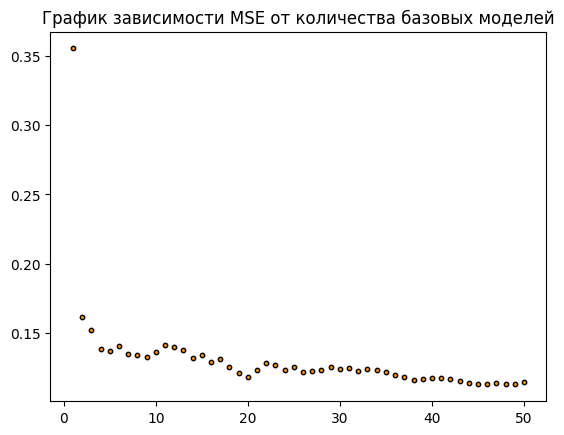

In [17]:
for i in range(1,51):
    regr = BaggingRegressor(DecisionTreeRegressor(max_depth = 5), max_samples=40, n_estimators=i, bootstrap=True, random_state=42) # Максимальная глубина 5
    regr.fit(X_train, y_train.ravel())
    print('MSE', i, mean_squared_error(y_test, regr.predict(X_test)))

    plt.scatter(i, mean_squared_error(y_test, regr.predict(X_test)),s=10,edgecolor="black",c= "darkorange")
    plt.title ("График зависимости MSE от количества базовых моделей") # Заголовок

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: __48

## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5, 
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [18]:
# RandomForestClassifier не работает с float

In [19]:
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, RandomForestRegressor

#X, y = generate_sin(250, 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model_2 = RandomForestRegressor(max_depth=5, max_samples=40, n_estimators=100, max_features=1, random_state=42)
model_2.fit(X_train, y_train.ravel())

print('MSE', round(mean_squared_error(y_test, model_2.predict(X_test)), 3))

MSE 0.113


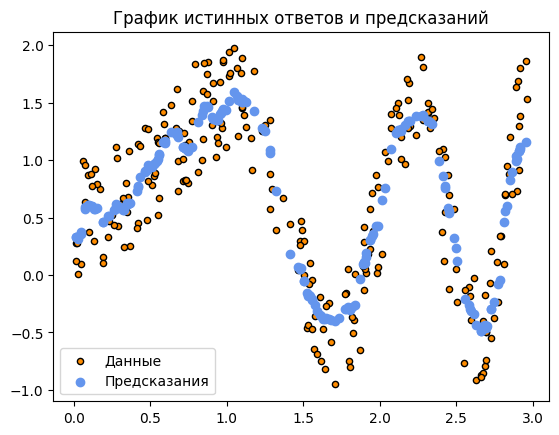

In [20]:
 # Нарисуйте точечную диаграмму цвет границы разброса edgecolors цвет точки c label label
plt.scatter(X,y, s=20,edgecolors="black",c="darkorange",label="Данные")
 # Цвет графика графика 
plt.scatter(X_train, model_2.predict(X_train),color="cornflowerblue",label="Предсказания",linewidth =1)

plt.title ("График истинных ответов и предсказаний") # Заголовок
plt.legend () # Отображение легенды
plt.show()